## EthnicSeer

In [10]:
import pandas as pd

mapping_df = pd.read_csv("data/OAG/country_distribution_with_ethnicseer.csv")
mapping_df

,country,count,percent,ISO3,ethnicseer_group
0,china,231579,17.253649,CHN,Chinese
1,usa,148225,11.043411,USA,English
2,france,102881,7.665085,FRA,French
3,japan,91606,6.825048,JPN,Japanese
4,germany,85593,6.377053,DEU,German
...,...,...,...,...,...
94,bhutan,21,0.001565,BTN,Other
95,north korea,16,0.001192,PRK,Korean
96,andorra,14,0.001043,AND,Other
97,laos,10,0.000745,LAO,Other


In [11]:
df = pd.read_json("data/OAG/cleaned/test_generated_100.jsonl", lines=True)


In [13]:
country_to_ethnicseer = dict(zip(mapping_df["country"].str.lower(), mapping_df["ethnicseer_group"]))
df["ethnicseer_group"] = df["country"].str.lower().map(country_to_ethnicseer)
df_ethnicseer = df[df["ethnicseer_group"].notna() & (df["ethnicseer_group"] != "Other")]
df_ethnicseer.to_csv("test_generated_100_ethnicseer_filtered.csv", index=False)

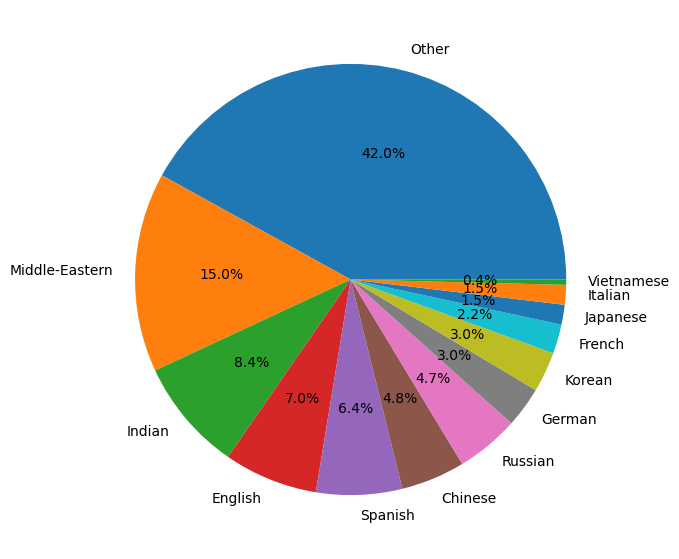

In [4]:
import matplotlib.pyplot as plt
df['ethnicseer_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.ylabel('')
plt.show()

In [ ]:
from ethnicseer import EthnicClassifier
# Middle-Eastern, Chinese, English, French, Vietnam, Spanish, Italian, German, Japanese, Russian, Indian, and Korean

ec = EthnicClassifier.load_pretrained_model()

In [ ]:
df_ethnicseer["ethnicseer_group_ethnicseer"] = df_ethnicseer["name"].apply(lambda x: ec.classify_names([x])[0])
df_ethnicseer

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score

# 12 EthnicSeer groups → 3-letter codes (case-insensitive mapping)
normalize_map = {
    "Middle-Eastern": "mea",
    "Chinese": "chi",
    "English": "eng",
    "French": "frn",
    "Vietnam": "vie",
    "Spanish": "spa",
    "Italian": "ita",
    "German": "ger",
    "Japanese": "jap",
    "Russian": "rus",
    "Indian": "ind",
    "Korean": "kor",
}
full2code = {k.lower(): v for k, v in normalize_map.items()}
allowed_codes = set(full2code.values())

df = df_ethnicseer.copy()

# Normalize and map
df["y_true_code"] = (
    df["ethnicseer_group"].astype(str).str.strip().str.lower().map(full2code)
)
df["y_pred_code"] = df["ethnicseer_group_ethnicseer"].astype(str).str.strip().str.lower()

y_true = df["y_true_code"].astype(str).str.strip().str.lower()
y_pred = df["y_pred_code"].astype(str).str.strip().str.lower()


print("Overall Accuracy:", accuracy_score(y_true, y_pred))
print("Weighted F1-score:", f1_score(y_true, y_pred, average='weighted'))
print("micro F1-score:", f1_score(y_true, y_pred, average='micro'))
print("macro F1-score:", f1_score(y_true, y_pred, average='macro'))

# full report by class
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("classification_report.csv")
report_df

### Aline our model with EthnicSeer

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# load predictions
prediction_df = pd.read_csv(
    "result/OAG/LSTM/compare_two_ALL_validated_augemented/test_rows_with_predictions.csv"
)

# load OAG→EthnicSeer mapping
mapping_df = pd.read_csv("data/OAG/all/country_distribution_with_ethnicseer.csv")

# build dictionary for fast lookup
country_to_es = mapping_df.set_index("country")["ethnicseer_group"].to_dict()


In [ ]:
def map_to_ethnicseer(label):
    return country_to_es.get(label, "Other")


In [ ]:
prediction_df["true_es_group"] = prediction_df["true_country"].apply(map_to_ethnicseer)
prediction_df["model1_pred_es_group"] = prediction_df["model1_pred_country"].apply(map_to_ethnicseer)
prediction_df["model2_pred_es_group"] = prediction_df["model2_pred_country"].apply(map_to_ethnicseer)


In [ ]:
filtered = prediction_df[
    (prediction_df["true_es_group"] != "Other") &
    (prediction_df["model1_pred_es_group"] != "Other") &
    (prediction_df["model2_pred_es_group"] != "Other")
].copy()

In [ ]:
y_true = filtered["true_es_group"]
y_pred1 = filtered["model1_pred_es_group"]

m1_acc = accuracy_score(y_true, y_pred1)
m1_wf1 = f1_score(y_true, y_pred1, average="weighted")
m1_mf1 = f1_score(y_true, y_pred1, average="macro")

print("Model1 - EthnicSeer 12-class performance:")
print(f"  Accuracy:    {m1_acc:.4f}")
print(f"  Weighted F1: {m1_wf1:.4f}")
print(f"  Macro F1:    {m1_mf1:.4f}")


In [ ]:
y_pred2 = filtered["model2_pred_es_group"]

m2_acc = accuracy_score(y_true, y_pred2)
m2_wf1 = f1_score(y_true, y_pred2, average="weighted")
m2_mf1 = f1_score(y_true, y_pred2, average="macro")

print("\nModel2 - EthnicSeer 12-class performance:")
print(f"  Accuracy:    {m2_acc:.4f}")
print(f"  Weighted F1: {m2_wf1:.4f}")
print(f"  Macro F1:    {m2_mf1:.4f}")


## name2nat

In [ ]:
from name2nat import Name2nat

my_nanat = Name2nat()

names = ["Donald Trump", # American
         "Moon Jae-in", # Korean
         "Shinzo Abe", # Japanese
         "Xi Jinping", # Chinese
         "Joko Widodo", # Indonesian
         "Angela Merkel", # German
         "Emmanuel Macron", # French
         "Kyubyong Park", # Korean
         "Yamamoto Yu", # Japanese
         "Jing Xu"] # Chinese
result = my_nanat(names, top_n=3)
print(result)

In [ ]:
import pandas as pd

df = pd.read_json("data/OAG/cleaned/test_validated.jsonl", lines=True)

In [ ]:
def extract_prediction(result):
    try:
        _, preds = result[0]
        label, conf = preds[0]
        return pd.Series([label, conf])
    except Exception as e:
        # handle unexpected output
        return pd.Series([None, None])
    
df[['pred_label_name2nat', 'pred_conf_name2nat']] = df['name'].apply(lambda x: extract_prediction(my_nanat(x)))
df

In [ ]:
# name2nat → OAG country normalization mapping
norm_map = {
    "American": "usa",
    "English": "united kingdom",
    "Scottish": "united kingdom",
    "Welsh": "united kingdom",
    "Irish": "ireland",
    "French": "france",
    "German": "germany",
    "Italian": "italy",
    "Spanish": "spain",
    "Portuguese": "portugal",
    "Dutch": "netherlands",
    "Belgian": "belgium",
    "Swiss": "switzerland",
    "Canadian": "canada",
    "Australian": "australia",
    "Chinese": "china",
    "Japanese": "japan",
    "Korean": "south korea",
    "Taiwanese": "taiwan",
    "Singaporean": "singapore",
    "Indian": "india",
    "Brazilian": "brazil",
    "Russian": "russia",
    "Mexican": "mexico",
    "Argentine": "argentina",
    "Polish": "poland",
    "Swedish": "sweden",
    "Norwegian": "norway",
    "Danish": "denmark",
    "Finn": "finland",
    "Greek": "greece",
    "Turk": "turkey",
    "Egyptian": "egypt",
    "Iranian": "iran",
    "Israeli": "israel",
    "Thai": "thailand",
    "Vietnamese": "vietnam",
    "Indonesian": "indonesia",
    "Malaysian": "malaysia",
    "Filipino": "philippines",
    "Pakistani": "pakistan",
    "Bangladeshi": "bangladesh",
    "Saudi": "saudi arabia",
    "Emirati": "united arab emirates",
    "Qatari": "qatar",
    "Kuwaiti": "kuwait",
    "Lebanese": "lebanon",
    "Jordanian": "jordan",
    "Chilean": "chile",
    "Colombian": "colombia",
    "Peruvian": "peru",
    "Venezuelan": "venezuela",
    "Romanian": "romania",
    "Hungarian": "hungary",
    "Czech": "czech republic",
    "Austrian": "austria",
    "Polish": "poland",
    "Ukrainian": "ukraine",
    "Croatian": "croatia",
    "Serb": "serbia",
    "Slovak": "slovakia",
    "Slovene": "slovenia",
    "Bulgarian": "bulgaria",
    "South African": "south africa",
    "Nigerian": "nigeria",
    "Kenyan": "kenya",
    "Ghanaian": "ghana",
    "Moroccan": "morocco",
    "Tunisian": "tunisia",
    "Algerian": "algeria",
}


In [ ]:
# normalize predicted label
df['pred_label_norm'] = (
    df['pred_label_name2nat']
    .str.strip()
    .str.lower()
    .map({k.lower(): v for k, v in norm_map.items()})
)

# fill unmapped ones as "other"
df['pred_label_norm'] = df['pred_label_norm'].fillna('other')


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

def evaluate_nameprism(df, label_col="country", pred_col="pred_label_norm"):
    """
    Compute accuracy, macro-F1, and weighted-F1 globally and per class.
    """
    df_valid = df.dropna(subset=[label_col, pred_col])
    y_true = df_valid[label_col]
    y_pred = df_valid[pred_col]

    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    weighted_f1 = f1_score(y_true, y_pred, average="weighted")

    print(f"Global Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1: {macro_f1:.4f}")
    print(f"Weighted F1: {weighted_f1:.4f}")

    print("\n Per-Class Metrics:")
    report = classification_report(y_true, y_pred, output_dict=True)
    per_class = pd.DataFrame(report).transpose()
    return acc, macro_f1, weighted_f1, per_class

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# filter out missing truth labels
mask = df['country'].notna()
y_true = df.loc[mask, 'country'].str.lower()
y_pred = df.loc[mask, 'pred_label_norm']

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Weighted F1:", f1_score(y_true, y_pred, average='weighted'))
print("Macro F1:", f1_score(y_true, y_pred, average='macro'))
print(classification_report(y_true, y_pred, digits=3))


## NamePrism

### preparation

In [ ]:
import pandas as pd

def read_jsonl_to_dataframe(filepath):
    df = pd.read_json(filepath, lines=True)
    return df

# df = read_jsonl_to_dataframe("/Users/mc/Desktop/Name2Demo/experiments/data/OAG/split_global_random_80_10_10/test/all_test.jsonl")
df = pd.read_csv("/Users/mc/Desktop/Name2Demo/experiments/result/OAG/validated_augmented.csv")
df


In [ ]:
df_augmented = df[df["added_later"] ==1.0]
df_augmented

In [ ]:
df = df_augmented.copy()

In [ ]:
mapping_df = pd.read_csv("/Users/mc/Desktop/Name2Demo/experiments/data/OAG/OAG_to_NamePrism_mapping.csv")
mapping_df

In [ ]:
country_to_NamePrism = dict(zip(mapping_df["country"].str.lower(), mapping_df["NamePrism_leaf"]))
df["NamePrism_group"] = df["country"].str.lower().map(country_to_NamePrism)
df_NamePrism = df[df["NamePrism_group"].notna() & (df["NamePrism_group"] != "Other")]
df_NamePrism

In [ ]:
import matplotlib.pyplot as plt
df['NamePrism_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.ylabel('')
plt.show()

In [ ]:
import pandas as pd
import requests
import time
import urllib.parse
import json
from pathlib import Path

api_token = "b4064b0ca1d77978"

def nameprism_predict_json(full_name: str, retry=3, sleep_sec=2):
    """
    Query NamePrism API and return the full JSON dictionary of predictions.
    Returns None if fails after retries.
    """
    base_url = f"https://www.name-prism.com/api_token/nat/json/{api_token}/"
    encoded_name = urllib.parse.quote(full_name.strip())
    url = base_url + encoded_name

    for attempt in range(retry):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                try:
                    data = response.json()
                    return data
                except json.JSONDecodeError:
                    print(f"[DecodeError] Could not parse JSON for: {full_name}")
                    return None
            else:
                print(f"[Warning] HTTP {response.status_code} for {full_name}")
        except Exception as e:
            print(f"[Error] {e} for {full_name}")
        time.sleep(sleep_sec * (attempt + 1))  # exponential backoff

    return None

In [ ]:
result = nameprism_predict_json("Cong Ming")
result

In [ ]:
def run_nameprism_on_df_json(df, output_csv="result/OAG/nameprism_results_augmented.jsonl",
                             start_idx=0, rate_limit_sec=1.0):
    """
    Run NamePrism JSON API on df['name'], append results to JSONL file (line per record).
    Safe against interruption; resumes if output file exists.
    """
    output_path = Path(output_csv)
    processed_ids = set()

    # Resume from previous file if exists
    if output_path.exists():
        with open(output_path, 'r') as f:
            for line in f:
                try:
                    record = json.loads(line)
                    processed_ids.add(record['id'])
                except Exception:
                    continue
        print(f"Resuming from {len(processed_ids)} completed records.")

    total = len(df)
    for i, row in df.iloc[start_idx:].iterrows():
        _id, name = row['id'], str(row['name']).strip()
        if _id in processed_ids:
            continue

        res = nameprism_predict_json(name)
        record = {
            "id": _id,
            "input_name": name,
            "response_raw": res,
            "status": "ok" if res else "failed"
        }

        # Append immediately (safe for interruption)
        with open(output_path, 'a') as f:
            f.write(json.dumps(record, ensure_ascii=False) + "\n")

        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{total} samples...")

        time.sleep(rate_limit_sec)

    print(f"✅ Done. Results saved to {output_csv}")

In [ ]:
df_NamePrism

In [ ]:
df_NamePrism_reset = df_NamePrism.reset_index()
df_NamePrism_reset

In [ ]:
run_nameprism_on_df_json(df_NamePrism_reset)

### Our model

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# load predictions
prediction_df = pd.read_csv(
    "result/OAG/LSTM/compare_two_pure_new_validated_augmented/test_rows_with_predictions.csv"
)

# load OAG→EthnicSeer mapping
mapping_df = pd.read_csv("data/OAG/OAG_to_NamePrism_mapping.csv")

# build dictionary for fast lookup
country_to_np = mapping_df.set_index("country")["NamePrism_leaf"].to_dict()


In [ ]:
def map_to_nameprism(label):
    return country_to_np.get(label, "Other")

In [ ]:
prediction_df["true_np_group"] = prediction_df["true_country"].apply(map_to_nameprism)
prediction_df["model1_pred_np_group"] = prediction_df["model1_pred_country"].apply(map_to_nameprism)
prediction_df["model2_pred_np_group"] = prediction_df["model2_pred_country"].apply(map_to_nameprism)


In [ ]:
filtered = prediction_df[prediction_df["true_np_group"] != "Other"].copy()
filtered

In [ ]:
y_true = filtered["true_np_group"]
y_pred1 = filtered["model1_pred_np_group"]

m1_acc = accuracy_score(y_true, y_pred1)
m1_wf1 = f1_score(y_true, y_pred1, average="weighted")
m1_mf1 = f1_score(y_true, y_pred1, average="macro")

print("Model1 - NamePrism 39-class performance:")
print(f"  Accuracy:    {m1_acc:.4f}")
print(f"  Weighted F1: {m1_wf1:.4f}")
print(f"  Macro F1:    {m1_mf1:.4f}")


In [ ]:
y_true = filtered["true_np_group"]
y_pred2 = filtered["model2_pred_np_group"]

m1_acc = accuracy_score(y_true, y_pred2)
m1_wf2 = f1_score(y_true, y_pred2, average="weighted")
m1_mf2 = f1_score(y_true, y_pred2, average="macro")

print("Model1 - NamePrism 39-class performance:")
print(f"  Accuracy:    {m1_acc:.4f}")
print(f"  Weighted F1: {m1_wf2:.4f}")
print(f"  Macro F1:    {m1_mf2:.4f}")


## Validation

In [ ]:
import pandas as pd

In [ ]:
test_random = pd.read_json("data/OAG/split_global_random_80_10_10/test/all_test.jsonl", lines=True)
test_random

In [ ]:
df = test_random.copy()

N = 1000  # desired number per country

sampled = (
    df.groupby("country", group_keys=False)
      .apply(lambda x: x.sample(min(len(x), N), random_state=42))
      .reset_index(drop=True)
)

country_counts = df['country'].value_counts()

low_resource_countries = country_counts[country_counts < N]
low_resource_countries


In [ ]:
sampled

In [ ]:
prompt_validation = """
You are validating whether a country label matches the naming pattern.

Given:
Name: {}
Claimed Country: {}

Task:
Determine whether this name is reasonably common for people from that country.
For countries with diverse or immigrant-based populations (such as USA, Canada, UK, Australia, Singapore), 
a name does NOT need to be exclusive to that country—only plausible.
For countries with distinctive naming traditions (such as Japan, Korea, Iceland, Thailand, Hungary, Vietnam), 
the name should match those specific conventions.

Be strict for distinctive-name countries, and plausible for multicultural countries.

Output only TRUE/FALSE
"""

In [ ]:
from openai import OpenAI
import time

client = OpenAI(api_key="")

def nationality_validation_openai(fullname, country, model_type, user_prompt):
    """Send one prediction request and return model output safely."""
    try:
        response = client.chat.completions.create(
            model=model_type,
            messages=[
                {"role": "system", "content": "You are an expert in demography."},
                {"role": "user", "content": user_prompt.format(fullname, country)},
            ],
        )
        return response.choices[0].message.content
        # return response
    except Exception as e:
        print(f"Error for '{fullname}': {e}")
        time.sleep(30)
        try:
            # one retry after waiting
            response = client.chat.completions.create(
                model=model_type,
                messages=[
                    {"role": "system", "content": "You are an expert in demography."},
                    {"role": "user", "content": user_prompt.format(fullname)},
                ],
            )
            return response.choices[0].message.content
        except Exception as e2:
            print(f"Retry failed for '{fullname}': {e2}")
            return None

In [ ]:
print(nationality_validation_openai("Cong Ming", "China", "gpt-4o", prompt_validation))

In [ ]:
print(nationality_validation_openai("Cong Ming", "USA", "gpt-4o", prompt_validation))

In [ ]:
print(nationality_validation_openai("Cong Ming", "United Kingdom", "gpt-4o", prompt_validation))

In [ ]:
print(nationality_validation_openai("Cong Ming", "South Africa", "gpt-4o", prompt_validation))

In [ ]:
print(nationality_validation_openai("Cong Ming", "Japan", "gpt-4o", prompt_validation))

In [ ]:
import time

def predict_and_save(df, name_col, country_col, model_type, user_prompt, output_path, start_index=0):
    """Predict nationality for each name and auto-save every 100 lines."""
    df = df.copy().reset_index(drop=True)

    if start_index > 0:
        print(f"Resuming from index {start_index}")

    for i in range(start_index, len(df)):
        fullname = df.iloc[i][name_col]
        country = df.iloc[i][country_col]
        prediction = nationality_validation_openai(fullname, country, model_type, user_prompt)
        df.loc[i, "val"] = prediction

        # save every 100 lines
        if (i + 1) % 100 == 0 or i == len(df) - 1:
            print(f"Saving progress at row {i+1}...")
            df.head(i + 1).to_csv(output_path, index=False)
            time.sleep(1)

    print("All predictions complete and saved.")
    return df

In [ ]:
sampled

In [ ]:
output_path = "result/OAG/test_validation.csv"
validated = predict_and_save(
    df=sampled,
    name_col="name",
    country_col="country",
    model_type="gpt-4o",
    user_prompt=prompt_validation,
    output_path=output_path
)

In [ ]:
validated

In [ ]:
validated = pd.read_csv("result/OAG/test_validation.csv")

In [ ]:
validated_true = validated[validated['val'] == True].copy()
validated_false = validated[validated['val'] == False].copy()


In [ ]:
valid_counts = validated_true['country'].value_counts().to_dict()

In [ ]:
used_ids = set(validated['id'])
remaining_pool = test_random[~test_random['id'].isin(used_ids)].copy()

In [ ]:
def get_topup_candidates(country, needed):
    cand = remaining_pool[remaining_pool['country'] == country]
    return cand.sample(min(len(cand), needed), random_state=42)

In [ ]:
topup_batches = []

for country in test_random['country'].unique():
    total_in_test = len(test_random[test_random['country'] == country])
    validated_so_far = valid_counts.get(country, 0)

    # Case A: small country <=1000 samples → skip
    if total_in_test <= 1000:
        continue

    # Case B: needs top-up
    if validated_so_far < 1000:
        needed = 1000 - validated_so_far
        batch = get_topup_candidates(country, needed)
        topup_batches.append(batch)

topup_candidates = pd.concat(topup_batches, ignore_index=True)


In [ ]:
topup_candidates

In [ ]:
output_path = "result/OAG/test_validation_topup.csv"
topup_validated = predict_and_save(
    df=topup_candidates,
    name_col="name",
    country_col="country",
    model_type="gpt-4o",
    user_prompt=prompt_validation,
    output_path=output_path
)

In [ ]:
validated_final = pd.concat([validated_true, 
                             topup_validated[topup_validated['val'] == True]],
                            ignore_index=True)


In [ ]:
validated_final.groupby('country').size()

In [ ]:
validated_final.to_csv("test_validation_final.csv")

In [ ]:
validated['val'] = validated['val'].astype(str).str.upper().map({'TRUE': True, 'FALSE': False})

country_validation_rate = (
    validated.groupby("country")['val']
             .agg(['count', 'sum'])
             .rename(columns={'count':'total', 'sum':'validated'})
)
country_validation_rate['rate'] = (
    country_validation_rate['validated'] / country_validation_rate['total']
)

country_validation_rate.sort_values('rate').head(50)


In [ ]:
import pandas as pd

df_random_augmented = pd.read_json("model/newSplit_80_10_10/test/all_test.jsonl", lines=True)
df_random_validated = pd.read_csv("result/OAG/test_validation_final.csv")

In [ ]:
df_random_validated

In [ ]:
validated_real = df_random_validated[df_random_validated['val'] == True].copy()
generated = df_random_augmented[df_random_augmented['added_later'] == True].copy()


In [ ]:
generated_sampled = (
    generated.groupby("country", group_keys=False)
             .apply(lambda x: x.sample(min(len(x), 1000), random_state=42))
             .reset_index(drop=True)
)


In [ ]:
validated_augmented = pd.concat([validated_real, generated_sampled], ignore_index=True)


In [ ]:
validated_augmented


In [ ]:
id = None
added_later = 1.0
mask_generated = validated_augmented['id'].isna()
generated_rows = validated_augmented[mask_generated]

In [ ]:
import pandas as pd

generated_ids = (
    generated_rows
    .groupby("country", group_keys=False)
    .apply(lambda g: [
        f"gen_{g.name.replace(' ', '_')}_{str(i).zfill(6)}"
        for i in range(len(g))
    ])
)

# Flatten the generated list into a Series aligned with the index
generated_ids = pd.Series(
    [item for sublist in generated_ids.tolist() for item in sublist],
    index=generated_rows.index
)


In [ ]:
validated_augmented.loc[mask_generated, 'id'] = generated_ids


In [ ]:
validated_augmented['id'].isna().sum()


In [ ]:
validated_augmented

In [ ]:
validated_augmented.to_csv("result/OAG/validated_augmented.csv", index=False)

## remove duplication

### OAG

In [ ]:
import pandas as pd
import unicodedata

def normalize_name(name):
    if pd.isna(name):
        return None
    name = unicodedata.normalize("NFKD", name)
    name = "".join([c for c in name if not unicodedata.combining(c)])
    return " ".join(name.lower().strip().split())

In [ ]:
import pandas as pd
df_train = pd.read_json("model/mbert/train/all_train.jsonl", lines=True) # training set with augmented data
df_val = pd.read_json("model/mbert/val/all_val.jsonl", lines=True) # validation with augmented data
df_test_random = pd.read_json("model/mbert/test/all_test.jsonl.bak", lines=True) 
df_test_validated_augmented = pd.read_csv("result/OAG/validated_augmented.csv") 

In [ ]:
df_train

In [ ]:
df_val

In [ ]:
df_test_random

In [ ]:
df_test_validated_augmented

In [ ]:
df_train['name_norm'] = df_train['name'].apply(normalize_name)
df_val['name_norm'] = df_val['name'].apply(normalize_name)
df_test_random['name_norm'] = df_test_random['name'].apply(normalize_name)
df_test_validated_augmented['name_norm'] = df_test_validated_augmented['name'].apply(normalize_name)

In [ ]:
train_names = set(df_train["name_norm"].dropna())

In [ ]:
val_overlap  = df_val[df_val["name_norm"].isin(train_names)]
df_test_random_overlap = df_test_random[df_test_random["name_norm"].isin(train_names)]
df_test_validated_augmented_overlap = df_test_validated_augmented[df_test_validated_augmented["name_norm"].isin(train_names)]

print("Validation overlap:", len(val_overlap))
print("Test A overlap:", len(df_test_random_overlap))
print("Test B overlap:", len(df_test_validated_augmented_overlap))

In [ ]:
df_val_clean = df_val[~df_val["name_norm"].isin(train_names)].copy()
df_test_random_clean = df_test_random[~df_test_random["name_norm"].isin(train_names)].copy()
df_test_validated_augmented_clean = df_test_validated_augmented[~df_test_validated_augmented["name_norm"].isin(train_names)].copy()

In [ ]:
df_val_clean

In [ ]:
df_val_original_clean = df_val_clean[df_val_clean['added_later'] != 1.0].copy()
df_val_original_clean

In [ ]:
df_val_clean.to_json("/Users/mc/Desktop/Name2Demo/experiments/data/OAG/cleaned/val_augmented.jsonl", lines=True, orient="records")
df_val_original_clean.to_json("/Users/mc/Desktop/Name2Demo/experiments/data/OAG/cleaned/val_original.jsonl", lines=True, orient="records")

In [ ]:
df_test_random_clean.to_json("/Users/mc/Desktop/Name2Demo/experiments/data/OAG/cleaned/test_original.jsonl", lines=True, orient="records")

In [ ]:
df_test_validated_augmented_clean.to_json("/Users/mc/Desktop/Name2Demo/experiments/data/OAG/cleaned/test_validated_augmented.jsonl", lines=True, orient="records")

In [ ]:
df_test_validated_augmented_clean

In [ ]:
def sample_group(group):
    # 'n' must be a single integer for sample()
    n_samples = min(len(group), 50) 
    return group.sample(n=n_samples, random_state=42)

df_strat = df_test_random_clean.groupby("country", group_keys=False).apply(sample_group)

df_strat

In [ ]:
df_strat.to_json("data/OAG/cleaned/test_original_stratified50.jsonl", lines=True, orient="records")

### NaNa

In [5]:
import pandas as pd

df_nana_train = pd.read_csv("data/nana/NaNa_with_OAG_label/train_with_OAG_label.csv")
df_nana_train

,Unnamed: 0,Name,Nationality,OAG_true
0,0,Sabra R. Greenhalgh,American,usa
1,1,Philip S. Yu,American,usa
2,2,Paul Gerken,American,usa
3,3,Edward Connelly,American,usa
4,4,Edmund Trowbridge Dana,American,usa
...,...,...,...,...
785662,890203,Remember Rose,Turk,turkey
785663,890204,Buddhist,Turk,turkey
785664,890205,Dunaden,Turk,turkey
785665,890206,One in a Million,Turk,turkey


In [6]:
df_nana_train= df_nana_train.rename(columns={'Name': 'name', 'OAG_true': 'country'})
df_nana_train.drop(columns=['Nationality'], inplace=True)
df_nana_train = df_nana_train.loc[:, ~df_nana_train.columns.str.contains('^Unnamed')]
df_nana_train

,name,country
0,Sabra R. Greenhalgh,usa
1,Philip S. Yu,usa
2,Paul Gerken,usa
3,Edward Connelly,usa
4,Edmund Trowbridge Dana,usa
...,...,...
785662,Remember Rose,turkey
785663,Buddhist,turkey
785664,Dunaden,turkey
785665,One in a Million,turkey


In [19]:
df_train_original = pd.read_json("data/OAG/cleaned/train_original.jsonl", lines=True)
df_val_agumented = pd.read_json("data/OAG/cleaned/val_augmented.jsonl", lines=True)
df_test_original = pd.read_json("data/OAG/cleaned/test_original.jsonl", lines=True)
df_test_validated_augmented = pd.read_json("data/OAG/cleaned/test_validated_augmented.jsonl", lines=True)

In [20]:
import pandas as pd
import unicodedata

def normalize_name(name):
    if pd.isna(name):
        return None
    name = unicodedata.normalize("NFKD", name)
    name = "".join([c for c in name if not unicodedata.combining(c)])
    return " ".join(name.lower().strip().split())

In [21]:
df_nana_train['norm_name'] = df_nana_train['name'].apply(normalize_name)
df_train_original['norm_name'] = df_train_original['name'].apply(normalize_name)
df_val_agumented['norm_name'] = df_val_agumented['name'].apply(normalize_name)
df_test_original['norm_name'] = df_test_original['name'].apply(normalize_name)
df_test_validated_augmented['norm_name'] = df_test_validated_augmented['name'].apply(normalize_name)

In [22]:
test_blocklist = set(df_test_original["norm_name"].dropna()) | set(df_test_validated_augmented["norm_name"].dropna())

In [23]:
df_nana_train_clean = df_nana_train[~df_nana_train["norm_name"].isin(test_blocklist)].copy()
print("Wiki removed due to leakage:", len(df_nana_train) - len(df_nana_train_clean))

Wiki removed due to leakage: 2082


In [24]:
df_train_original

,id,name,org,country,norm_name
0,53f42b76dabfaeb2acfcc08c,James Brooke,Applied Mathematics and Mathematical Physics D...,canada,james brooke
1,64577c42795b5754c8b5a456,Nguyen Minh Quan,"Graduate University of Science and Technology,...",vietnam,nguyen minh quan
2,53f46438dabfaefedbb807ad,W Nahm,"Geological and Environmental Hazards Division,...",south korea,w nahm
3,6325a9ccf5ee9683ec77bc79,Zhenpeng Li,"Alibaba Group, China;Alibaba Group, China",china,zhenpeng li
4,542ce894dabfae4b91c2d81a,Zhenpeng Li,"Department of Land Resources Management,China ...",china,zhenpeng li
...,...,...,...,...,...
1073917,56198ec645ce1e59643e3643,Dobrzynska Agnieszka,Andalusian Center for Developmental Biology (C...,spain,dobrzynska agnieszka
1073918,53f46d03dabfaedf4365f7b5,Suryakant Tripathi,"Professor, Department of Pulmonary Medicine, F...",india,suryakant tripathi
1073919,53f42d28dabfaec09f11162b,Xavier Ferrieres,"ONERA, Electromagnetism and Radar Department, ...",france,xavier ferrieres
1073920,53f43324dabfaee0d9b4496a,Ulrich V.D. Esche,Institut fuer Molekulare Medizin und Zellforsc...,germany,ulrich v.d. esche


In [25]:
df_nana_train_clean

,name,country,norm_name
0,Sabra R. Greenhalgh,usa,sabra r. greenhalgh
1,Philip S. Yu,usa,philip s. yu
2,Paul Gerken,usa,paul gerken
3,Edward Connelly,usa,edward connelly
4,Edmund Trowbridge Dana,usa,edmund trowbridge dana
...,...,...,...
785662,Remember Rose,turkey,remember rose
785663,Buddhist,turkey,buddhist
785664,Dunaden,turkey,dunaden
785665,One in a Million,turkey,one in a million


In [26]:
df_oag = df_train_original.copy()
df_oag["source"] = "oag"

df_wiki = df_nana_train_clean.copy()
df_wiki["source"] = "wiki"

df_combined = pd.concat([df_oag, df_wiki], ignore_index=True)

In [27]:
df_combined

,id,name,org,country,norm_name,source
0,53f42b76dabfaeb2acfcc08c,James Brooke,Applied Mathematics and Mathematical Physics D...,canada,james brooke,oag
1,64577c42795b5754c8b5a456,Nguyen Minh Quan,"Graduate University of Science and Technology,...",vietnam,nguyen minh quan,oag
2,53f46438dabfaefedbb807ad,W Nahm,"Geological and Environmental Hazards Division,...",south korea,w nahm,oag
3,6325a9ccf5ee9683ec77bc79,Zhenpeng Li,"Alibaba Group, China;Alibaba Group, China",china,zhenpeng li,oag
4,542ce894dabfae4b91c2d81a,Zhenpeng Li,"Department of Land Resources Management,China ...",china,zhenpeng li,oag
...,...,...,...,...,...,...
1857502,NaN,Remember Rose,NaN,turkey,remember rose,wiki
1857503,NaN,Buddhist,NaN,turkey,buddhist,wiki
1857504,NaN,Dunaden,NaN,turkey,dunaden,wiki
1857505,NaN,One in a Million,NaN,turkey,one in a million,wiki


In [29]:
df_combined.to_json("data/OAG/cleaned/train_combined.jsonl", lines=True, orient="records")

In [31]:
mapping = pd.read_csv("data/OAG/OAG_to_NamePrism_mapping.csv")
df_train = pd.read_json("data/OAG/cleaned/train_original.jsonl", lines=True)
df_val = pd.read_json("data/OAG/cleaned/val_original.jsonl", lines=True)

In [32]:
mapping

,country,NamePrism_leaf
0,china,Chinese
1,usa,CelticEnglish
2,france,French
3,japan,Japan
4,germany,German
...,...,...
94,bhutan,SouthAsian
95,north korea,South Korea
96,andorra,Spanish
97,laos,Thailand
